In [2]:
#importing necessery libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing file
df=pd.read_csv("supply_chain_data.csv")
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58.0,7.0,96,4,Carrier B,2.956572,Supplier 3,Mumbai,NaN,215.0,29.0,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53.0,30.0,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23.0,517.0,30.0,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1.0,10.0,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12.0,971.0,27.0,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23.0,13.0,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24.0,937.0,18.0,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5.0,3.0,56,8,Carrier A,3.890548,Supplier 1,Delhi,5.0,414.0,3.0,92.065161,Fail,3.145580,Air,Route A,923.440632


#### Data Preprocessing

In [5]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    102 non-null    float64
 3   Availability             102 non-null    int64  
 4   Number of products sold  102 non-null    int64  
 5   Revenue generated        101 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             101 non-null    float64
 8   Lead times               101 non-null    float64
 9   Order quantities         102 non-null    int64  
 10  Shipping times           102 non-null    int64  
 11  Shipping carriers        102 non-null    object 
 12  Shipping costs           101 non-null    float64
 13  Supplier name            102 non-null    object 
 14  Location                 1

In [7]:
#checking null values
df.isnull().sum()

Product type               2
SKU                        2
Price                      0
Availability               0
Number of products sold    0
Revenue generated          1
Customer demographics      2
Stock levels               1
Lead times                 1
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             1
Supplier name              0
Location                   0
Lead time                  4
Production volumes         2
Manufacturing lead time    1
Manufacturing costs        0
Inspection results         2
Defect rates               1
Transportation modes       1
Routes                     0
Costs                      2
dtype: int64

In [8]:
#drop Lead times because of two same name columns
df.drop(columns='Lead times',inplace=True)

In [9]:
# Filling null values

In [10]:
df['Product type']=df['Product type'].fillna(method='ffill')

C:\Users\Sakib Ahmed\AppData\Local\Temp\ipykernel_11844\2870922162.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Product type']=df['Product type'].fillna(method='ffill')


In [11]:
df.drop(df[df['SKU'].isnull()].index,axis=0,inplace=True)

In [12]:
df['Revenue generated']=df['Revenue generated'].fillna(df['Revenue generated'].median())

In [13]:
df['Customer demographics']=df['Customer demographics'].fillna(method='ffill');

C:\Users\Sakib Ahmed\AppData\Local\Temp\ipykernel_11844\657233954.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Customer demographics']=df['Customer demographics'].fillna(method='ffill');


In [14]:
df['Stock levels']=df['Stock levels'].fillna(method='bfill')

C:\Users\Sakib Ahmed\AppData\Local\Temp\ipykernel_11844\3310499908.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Stock levels']=df['Stock levels'].fillna(method='bfill')


In [15]:
avg_shipping_cost=df.groupby('Supplier name')['Shipping costs'].mean()
df['Shipping costs']=df.apply(lambda x: avg_shipping_cost[x['Supplier name']] 
                                if pd.isnull(x['Shipping costs']) else x['Shipping costs'],axis=1)

In [16]:
avg_Lead_time=df.groupby('Transportation modes')['Lead time'].mean()
df['Lead time']=df.apply(lambda x: avg_Lead_time[x['Transportation modes']] 
                                if pd.isnull(x['Lead time']) else x['Lead time'],axis=1)

In [17]:
df['Production volumes']=df['Production volumes'].fillna(df['Production volumes'].median())

In [18]:
df['Manufacturing lead time']=df['Manufacturing lead time'].fillna(df['Manufacturing lead time'].median())

In [19]:
df['Manufacturing costs']=df['Manufacturing costs'].fillna(df['Manufacturing costs'].mean())

In [20]:
df['Defect rates']=df['Defect rates'].fillna(df['Defect rates'].mean())

In [21]:
df['Costs']=df['Costs'].fillna(df['Costs'].mean())

In [22]:
df['Inspection results']=df['Inspection results'].fillna(df['Inspection results'].mode()[0])

In [23]:
df['Transportation modes']=df['Transportation modes'].fillna(df['Transportation modes'].mode()[0])

In [24]:
cols_2_change=['Stock levels','Lead time','Production volumes','Manufacturing lead time']
df[cols_2_change]=df[cols_2_change].astype('int64')

In [25]:
#dealing with duplicates data
df.duplicated().sum()
df.drop_duplicates().reset_index()

,index,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,96,4,Carrier B,2.956572,Supplier 3,Mumbai,17,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,96,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,26,9,Carrier B,8.630339,Supplier 4,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
94,97,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,32,3,Carrier C,5.352878,Supplier 3,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
95,98,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,4,9,Carrier A,7.904846,Supplier 4,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
96,100,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,27,7,Carrier B,1.409801,Supplier 5,Chennai,28,563,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [26]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.330286,47.490000,454.440000,5830.648169,47.220000,48.580000,5.650000,5.484442,17.220000,560.740000,14.630000,47.154970,2.269081,538.198357
std,30.979448,30.019016,299.216631,2738.284254,31.397285,26.933206,2.742759,2.676941,8.601832,260.178323,9.044955,28.994350,1.475071,251.946494
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.000000,1.085069,0.018608,110.364335
25%,19.937284,22.750000,184.250000,2812.847151,16.750000,26.000000,3.000000,3.292693,10.000000,352.000000,7.000000,22.983299,0.992032,323.447385
50%,51.692270,43.000000,385.500000,6099.944116,46.500000,52.000000,6.000000,5.262922,18.000000,563.000000,14.000000,45.905622,2.141863,534.003540
75%,78.152424,74.250000,701.750000,8327.822318,71.500000,68.750000,8.000000,7.601695,25.000000,793.250000,23.000000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.000000,99.466109,4.939255,997.413450


#### Supplier analysis

In [27]:
#supplier with their average lead times
df.groupby("Supplier name")['Lead time'].mean().round(2)

Supplier name
Supplier 1    14.81
Supplier 2    19.05
Supplier 3    19.33
Supplier 4    15.30
Supplier 5    18.94
Name: Lead time, dtype: float64

In [28]:
df.groupby(['Customer demographics', 'Product type'])['Number of products sold'].sum()

Customer demographics  Product type
Female                 cosmetics       4438
                       haircare         936
                       skincare        7853
Male                   cosmetics       2679
                       haircare        2213
                       skincare        2911
Non-binary             cosmetics       2853
                       haircare        3716
                       skincare        3542
Unknown                cosmetics       1847
                       haircare        7642
                       skincare        4814
Name: Number of products sold, dtype: int64

<Axes: xlabel='Supplier name'>

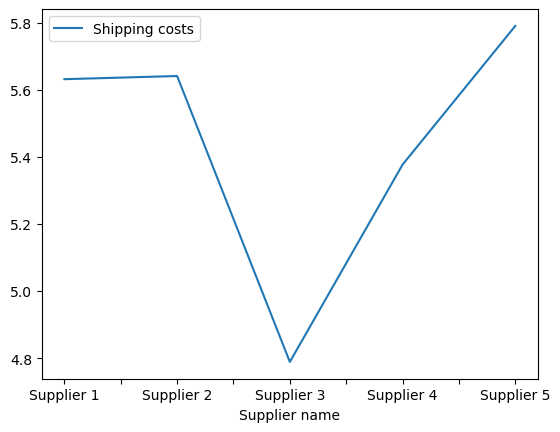

In [29]:
#visualizing supplier with their shipping costs
sup_cost=df.pivot_table(index='Supplier name',values='Shipping costs',aggfunc='mean')
sup_cost.plot()

In [30]:
# suppliers orders by different transport
df.pivot_table(index='Supplier name',columns='Transportation modes',values='Order quantities',aggfunc='sum')

Transportation modes,Air,Rail,Road,Sea
Supplier name,,,,
Supplier 1,782,177,274,156
Supplier 2,124,487,157,182
Supplier 3,20,148,279,185
Supplier 4,155,221,490,53
Supplier 5,260,178,322,208


In [31]:
#suppliers vs their orders and revenue
dr=df.groupby('Supplier name')[['Order quantities','Revenue generated']].sum()
dr['per_order_rev']=dr['Revenue generated']/dr['Order quantities']
dr.round(2)

,Order quantities,Revenue generated,per_order_rev
Supplier name,,,
Supplier 1,1389,152086.91,109.49
Supplier 2,950,119962.51,126.28
Supplier 3,632,97795.98,154.74
Supplier 4,919,102875.95,111.94
Supplier 5,968,110343.46,113.99


#### Products analysis

In [32]:
# products by its ranges
df.groupby('Product type')['Price'].agg(['min','max'])

,min,max
Product type,,
cosmetics,2.397275,97.760086
haircare,1.699976,97.446947
skincare,4.078333,99.171329


<Axes: xlabel='Product type'>

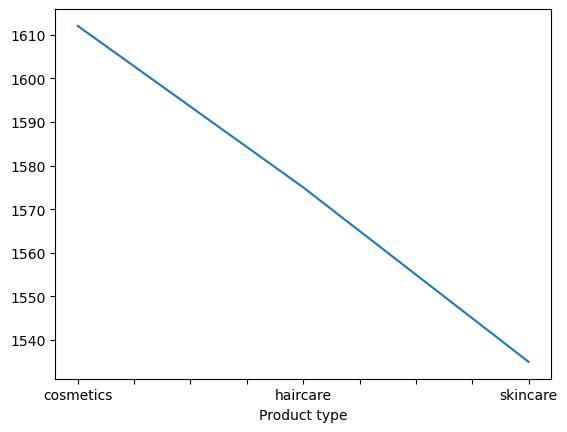

In [33]:
# products by total stocks
prod_stock=df.groupby('Product type')['Stock levels'].sum()
prod_stock.plot()

In [34]:
#products with its sold quantity and average price
df.groupby('Product type')[['Price','Number of products sold','Lead time']].agg({'Number of products sold':'sum','Price':'mean','Lead time':'mean'})

,Number of products sold,Price,Lead time
Product type,,,
cosmetics,11817,58.149164,14.750000
haircare,14507,46.409344,18.342857
skincare,19120,48.122297,18.027027


In [35]:
# products with its manufacturing processes
df.groupby('Product type')[['Manufacturing costs','Manufacturing lead time','Production volumes']].agg('mean').round(2)

,Manufacturing costs,Manufacturing lead time,Production volumes
Product type,,,
cosmetics,43.76,12.39,474.89
haircare,48.93,16.83,575.46
skincare,48.04,14.24,611.78


<Axes: xlabel='Product type'>

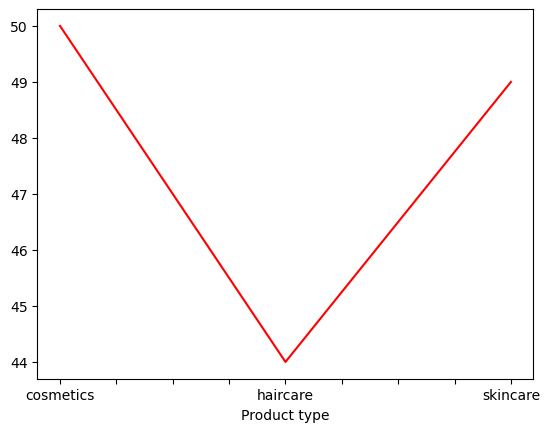

In [36]:
#visualizing products by its Availability 
avail=df.groupby('Product type')['Availability'].mean().round()
avail.plot(color='r')

<Axes: xlabel='Product type'>

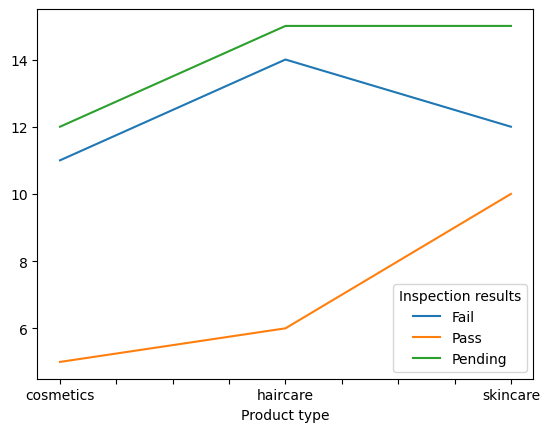

In [37]:
#products Inspection results
insp=df.pivot_table(index='Product type',values='SKU',columns='Inspection results',aggfunc='count')
insp.plot()

#### Transportation analysis

<Axes: xlabel='Transportation modes'>

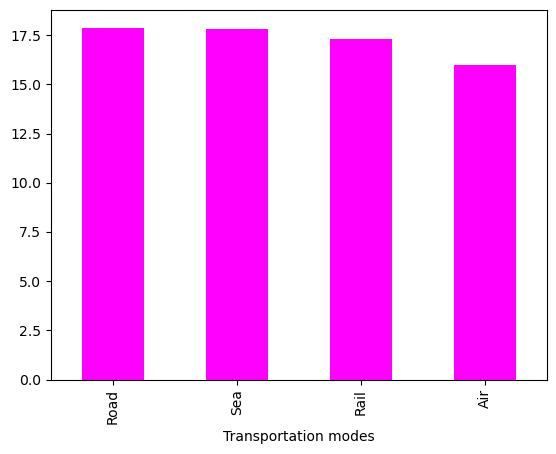

In [38]:
# transports by its average lead time
time=df.groupby("Transportation modes")['Lead time'].mean().round(2).sort_values(ascending=False)
time.plot(kind='bar',color='magenta')

In [39]:
#transport success rate and defect rates
defec=df.groupby('Transportation modes')[['Defect rates']].mean()
defec['succes_rate']=100-defec['Defect rates']
defec

,Defect rates,succes_rate
Transportation modes,,
Air,1.743216,98.256784
Rail,2.427583,97.572417
Road,2.542874,97.457126
Sea,2.318461,97.681539


In [40]:
#orders by transports in different locations
df.groupby(['Transportation modes','Location'])['Order quantities'].sum()

Transportation modes  Location 
Air                   Bangalore    100
                      Chennai      362
                      Delhi        213
                      Kolkata      261
                      Mumbai       405
Rail                  Bangalore    301
                      Chennai      206
                      Delhi        308
                      Kolkata      283
                      Mumbai       113
Road                  Bangalore    300
                      Chennai      378
                      Delhi         44
                      Kolkata      559
                      Mumbai       241
Sea                   Bangalore     10
                      Chennai      229
                      Delhi         96
                      Kolkata      125
                      Mumbai       324
Name: Order quantities, dtype: int64